# Lab 9

## Clustering

### Problem Definition

**Given:** A set of unlabeled examples (unsupervised learning)

**Goal:** Group the examples into clusters such that, examples in the same cluster are similar and examples in different clusters are dissimilar

Note: Clustering often is not the final objective but is often done as a step to help some other learning task

Examples: Clustering in news articles to identify trends, clustering images via image segmentation

## K-means Problem

A clustering is identified by the mean (center) of each cluster $C_j$ :

$$ \mu_j = \frac{1}{|C_j|}\sum_{x \in C_j}{x}$$

The **cost** of a clustering is the sum of the squared (Euclidean) distances of the points from their respective cluster centers:

$$W(C) = \sum_{j = 1}^{k}{\sum_{x \in C_j}{||x-\mu_j||}^2} $$

The k-means problem is to find the min-cost clustering of the examples into k clusters.

$$\argmin_{C_1, ... ,C_k} = \sum_{j = 1}^{k}{\sum_{x \in C_j}{||x-\mu_j||}^2} $$

Unfortunately k-means is NP-hard, even when, k = 2 with general dimension and when dimension is 2 with general k

## Lloyd's Algorithm:

Choose k initial cluster centers $\mu_1, ... , \mu_k$

Repeat the following steps until cluster membership does not change:

1. Assign each point to the cluster that has center closest to it:\
$$ \text{Assign each } x_i \text{ to cluster } C_{j^{*}} \text{ for } j^{*} = \argmin_{j\in[k]}{||x_i-\mu_i||}$$ 

2. Update the center of each cluster based on the new assignment:\
$$\forall{j \in [k]} \hspace{1cm} \mu_j = \frac{1}{|C_j|}\sum_{x \in C_j}{x}$$

Note: This algorithm converges if you let it run long enough as there are only finitely many clusterings, and in every iteration it makes progress. (Ussually only takes about 10 iterations)

## Issues

Doesn't work well when the natural clusters:

- Have drastically different sizes

- Have drastically different densities 

- Are non globular

Note: If a cluster has graph-theoretic structure (points in a cluster have nearest neighbors in the cluster), a good method is spectral clustering

## Example

In [19]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

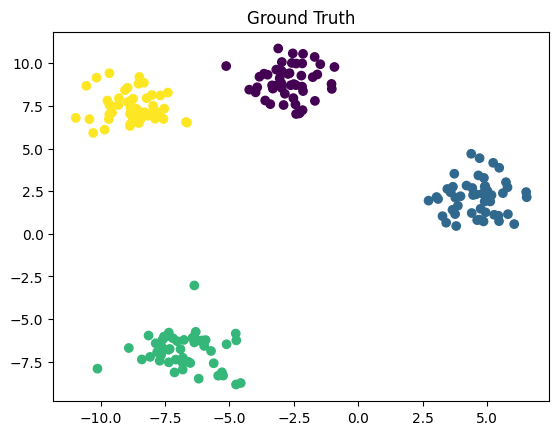

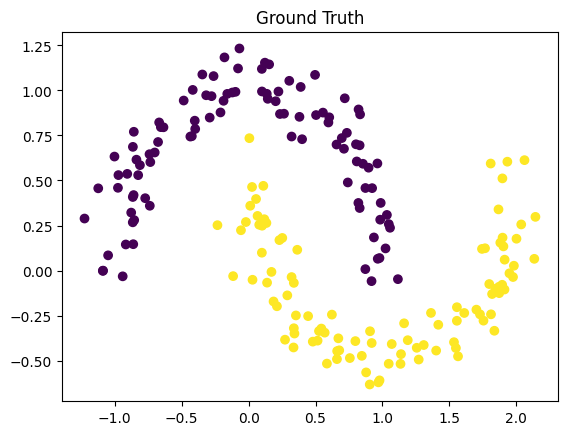

In [20]:
# Make some datasets
blobs_X, blobs_y, blob_centers = datasets.make_blobs(n_samples = 200, random_state = 42, centers = 4, return_centers=True, shuffle=True)

moons_X, moons_y = datasets.make_moons(n_samples = 200, random_state = 42, shuffle=True, noise=0.1)

# Plot the data
plt.scatter(blobs_X[:,0], blobs_X[:,1], c = blobs_y)
plt.title('Ground Truth')
plt.show()

plt.scatter(moons_X[:,0], moons_X[:,1], c = moons_y)
plt.title('Ground Truth')
plt.show()

### Step by Step Version

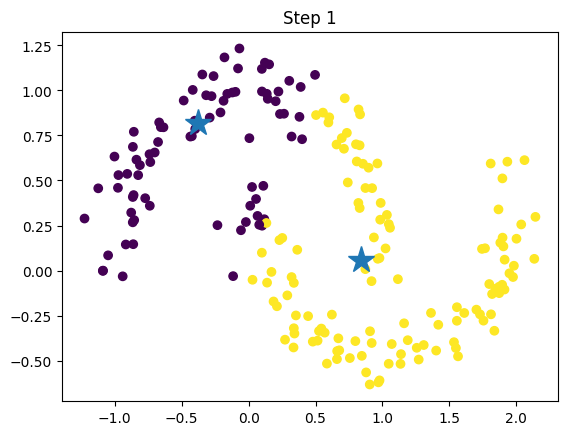

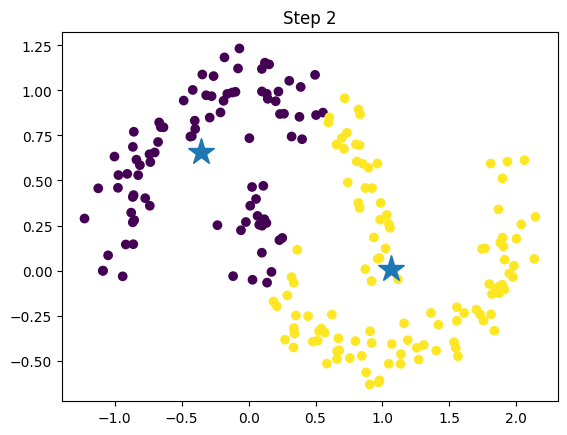

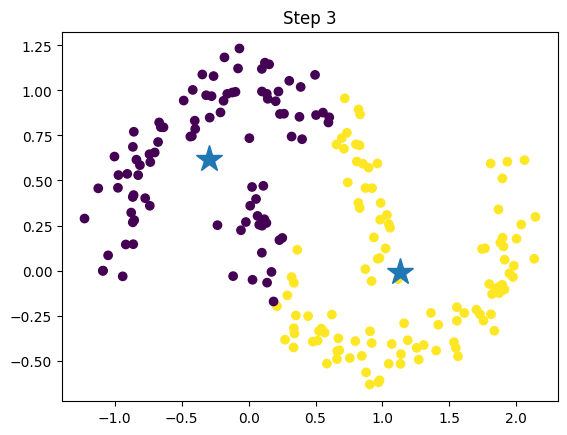

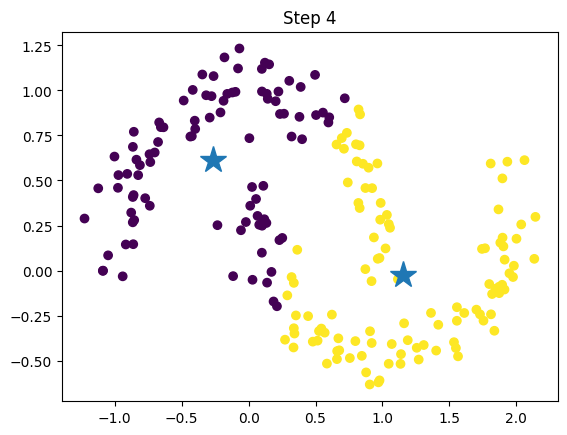

In [21]:
for i in range(1,5):
    # Performing clustering with random initialization
    model = KMeans(n_clusters=2, init="random", n_init=1, random_state = 15, max_iter = i)
    model.fit(moons_X)

    # Plot the predictions
    plt.scatter(moons_X[:,0], moons_X[:,1], c = model.labels_)
    plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = '*', ls='none', ms=20)
    plt.title(f'Step {i}')
    plt.show()

### One Go Version

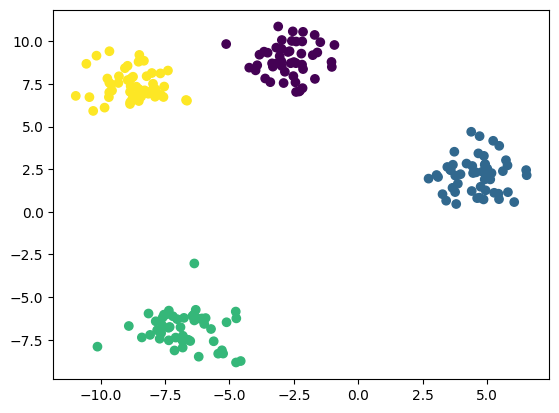

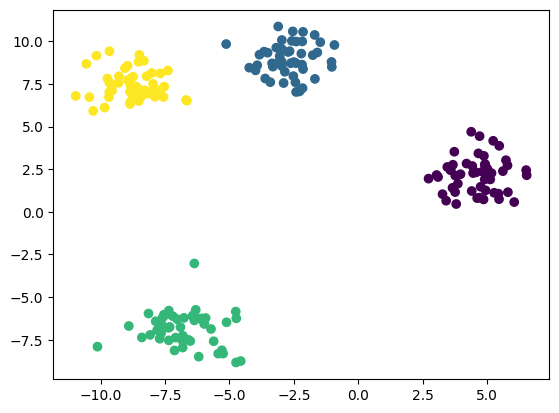

In [22]:
# Performing clustering with random initialization
model = KMeans(n_clusters=4, init="random", n_init=1, random_state = 42)
model.fit(blobs_X)

# Plot the ground truth data
plt.scatter(blobs_X[:,0], blobs_X[:,1], c = blobs_y)
plt.show()

# Plot the predictions
plt.scatter(blobs_X[:,0], blobs_X[:,1], c = model.labels_)
plt.show()

#### Improvements

1. We often run multiple iterations and pick the best one to combat bad results from poor random initialization.

2. We also use k-means++ instead of pure randomness to choose initial centers:

    - Choose 1st center at random from the given examples
    
    - Choose each successive center randomly from the remaining examples with probability proportional to the squarded distance of that example to its closest existing center

#### How to choose k?

Intuitively, plot the k vs cost function graph and choose the point at which the cost function stops decreasing rapidly. 
When performance stops improving as much we should stop because we are probably going to overfit the data if we keep increasing k.

Intuitively, plot the k vs cost function graph and choose the point at which the cost function stops decreasing rapidly. 
When performance stops improving as much we should stop because we are probably going to overfit the data if we keep increasing k.

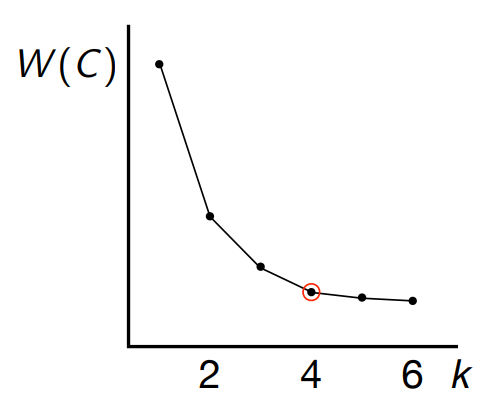

For an automated version see here: 

https://hastie.su.domains/Papers/gap.pdf

For an automated version see here: 

https://hastie.su.domains/Papers/gap.pdf

#### Further reading:

- Heirarchical Clustering and dendrograms

- Different distance/similarity measures

- Different linkage methods

# Student Section

2


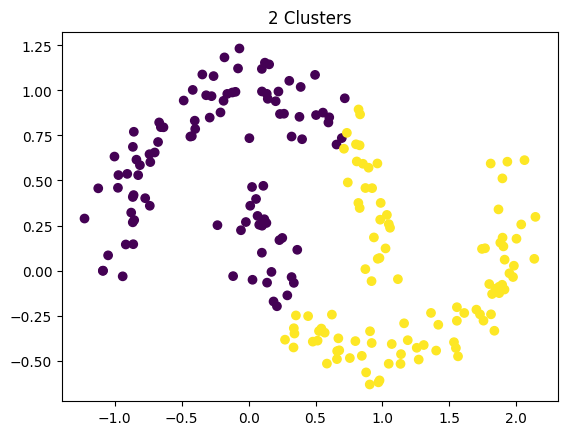

4


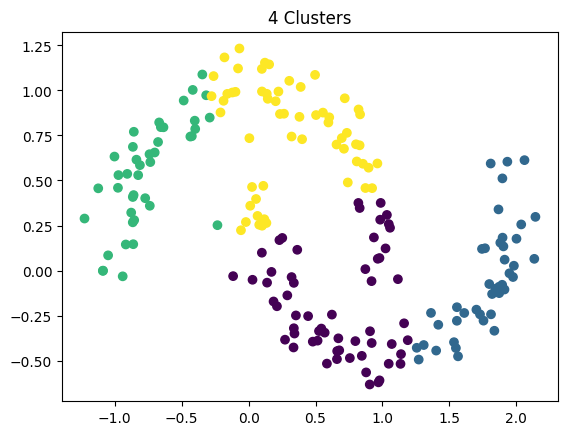

8


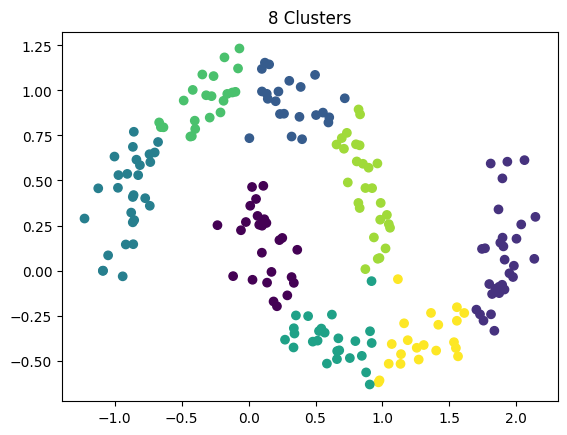

16


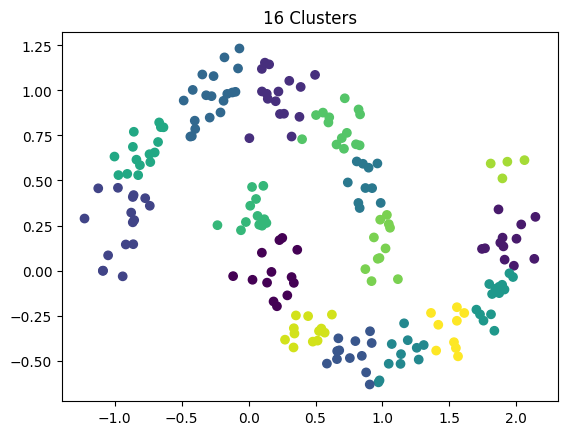

In [24]:
# Performing clustering on the moons dataset with the following cluster sizes [2,4,8,16] 
# Only parameters to pass is random_state = 42 and n_clusters

for i in (2,4,8,16):
    print(i)
    model = KMeans(n_clusters = i, random_state=42)
    model.fit(moons_X)

    # Plot the predictions with a title in the form 'K-Clusters'
    plt.scatter(moons_X[:,0], moons_X[:,1], c=model.labels_)
    plt.title(f'{i} Clusters')
    plt.show()